In [1]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

np.random.seed(2)

n_samples = 100
var1 = np.random.normal(loc=3, scale=26, size=n_samples)
var2 = np.random.normal(loc=2, scale=28, size=n_samples)
# var3 = np.random.normal(loc=3, scale=47, size=n_samples)
# var4 = np.random.normal(loc=6, scale=7, size=n_samples)
var3 = np.random.normal(loc=8, scale=9, size=n_samples)
y = 8000*var1+6000*var2+np.random.normal(loc=0, scale=1, size=n_samples)
Y = []
for i in y:
    if i > 0:
        Y.append(1)
    else:
        Y.append(0)
#         print(1)
label = Y

In [2]:
data = pd.DataFrame({'var1': var1, 'var2': var2, 'var3': var3, 'Y': Y})
data

,var1,var2,var3,Y
0,-7.835704,34.522602,-2.359026,1
1,1.537062,12.810185,4.161298,1
2,-52.541098,-29.727732,6.666675,0
3,45.647041,14.126592,21.512932,1
4,-43.629325,-6.514420,15.826384,0
...,...,...,...,...
95,30.061423,52.525346,10.631889,1
96,12.892271,7.051475,-2.754999,1
97,-2.645517,17.488600,3.608625,1
98,33.511819,30.924814,6.442360,1


In [3]:
from scipy.stats import shapiro
# Test normal
for i in range(3):
    stat, p_value = shapiro(data.iloc[:, i])
    if p_value < 0.01:
        print(p_value,i)

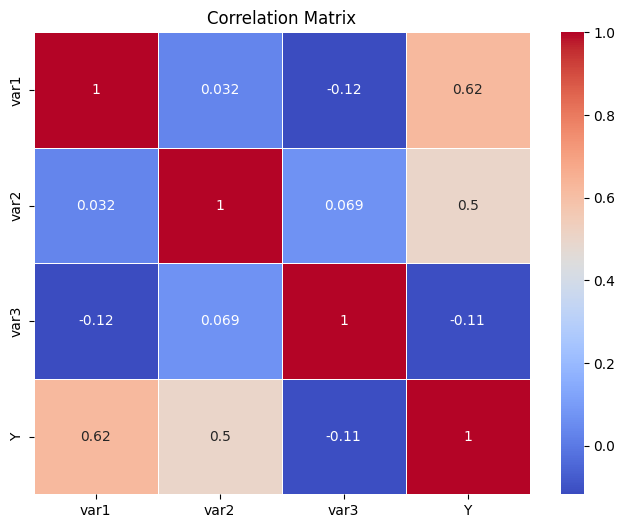

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# 打印相关性系数
# print(correlation_matrix)

In [5]:
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]
X

,var1,var2,var3
0,-7.835704,34.522602,-2.359026
1,1.537062,12.810185,4.161298
2,-52.541098,-29.727732,6.666675
3,45.647041,14.126592,21.512932
4,-43.629325,-6.514420,15.826384
...,...,...,...
95,30.061423,52.525346,10.631889
96,12.892271,7.051475,-2.754999
97,-2.645517,17.488600,3.608625
98,33.511819,30.924814,6.442360


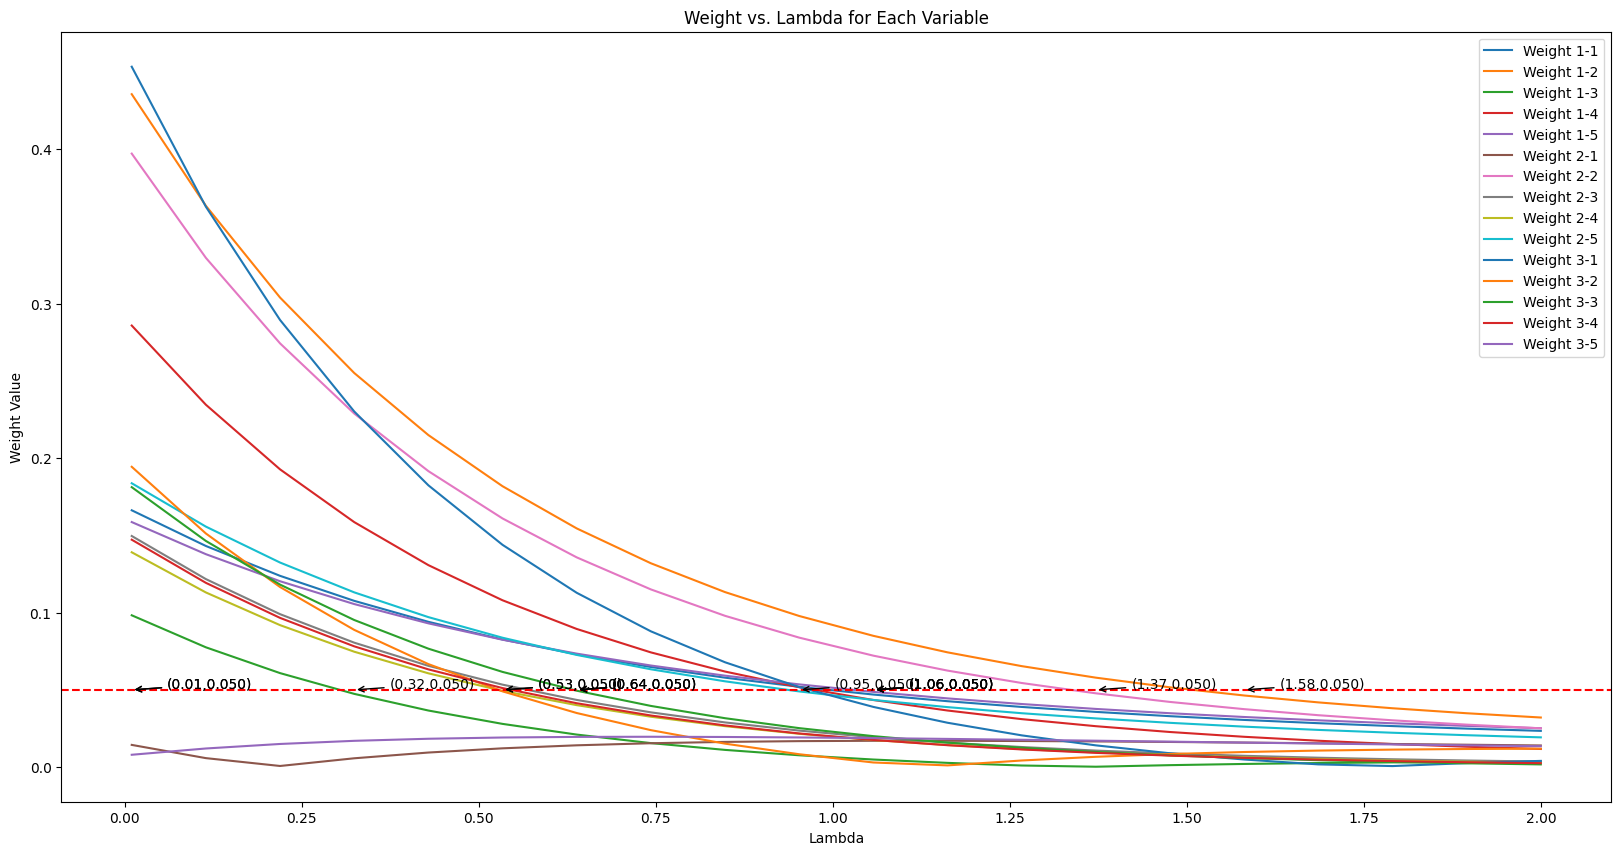

Lambda values when weights drop below threshold:
tensor([[1.0574, 0.0100, 1.0574],
        [1.5811, 1.3716, 0.5337],
        [0.3242, 0.6384, 0.6384],
        [1.0574, 0.5337, 0.6384],
        [1.0574, 0.9526, 0.0100]])

Intersection Points (Lambda, Weight):
(1.06, 0.050)
(1.58, 0.050)
(0.32, 0.050)
(1.06, 0.050)
(1.06, 0.050)
(0.01, 0.050)
(1.37, 0.050)
(0.64, 0.050)
(0.53, 0.050)
(0.95, 0.050)
(1.06, 0.050)
(0.53, 0.050)
(0.64, 0.050)
(0.64, 0.050)
(0.01, 0.050)
Lambda values when weights drop below threshold:
tensor([[1.0574, 0.0100, 1.0574],
        [1.5811, 1.3716, 0.5337],
        [0.3242, 0.6384, 0.6384],
        [1.0574, 0.5337, 0.6384],
        [1.0574, 0.9526, 0.0100]])


In [96]:
net = Net()
net_copy = Net()
net_copy.load_state_dict(net.state_dict())

optimizer = optim.SGD(net.parameters(), lr=0.01)
criterion = nn.MSELoss()

lambda_range = torch.linspace(2.0, 0.01, 20)

weights = []
lambda_array = torch.zeros_like(net.fc1.weight)  # 初始化lambda_array

for lambda_val in lambda_range:
    net.load_state_dict(net_copy.state_dict())
    
    for epoch in range(100):
        optimizer.zero_grad()
        output = net(feature)
        loss = criterion(output, Y)
        l2_reg = lambda_val * torch.sum(torch.pow(net.fc1.weight, 2))
        total_loss = loss + l2_reg
        total_loss.backward()
        optimizer.step()

    with torch.no_grad():
        below_threshold = (torch.abs(net.fc1.weight) < 0.05)
        lambda_array[below_threshold] = lambda_val.item()
        
    weight_values = [param.data.clone() for param in net.fc1.parameters() if len(param.size()) > 1][0]
    weight_values = weight_values.detach().cpu().numpy()
    weights.append(weight_values)

weights = np.array(weights)
intersection_points = [] 

plt.figure(figsize=(20, 10))
for j in range(weights.shape[2]):
    for i in range(weights.shape[1]):
        plt.plot(lambda_range.numpy(), abs(weights[:, i, j]), label=f'Weight {j + 1}-{i + 1}')

plt.axhline(y=0.05, color='r', linestyle='--')
for j in range(lambda_array.shape[1]):
    for i in range(lambda_array.shape[0]):
        if lambda_array[i, j] > 0:
            y_val = 0.05
            x_val = lambda_array[i, j]
            intersection_points.append((x_val, y_val))
            plt.annotate(f'({x_val:.2f},{y_val:.3f})', xy=(x_val, y_val), xytext=(x_val+0.05, y_val+0.001), arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.xlabel('Lambda')
plt.ylabel('Weight Value')
plt.legend()
plt.title('Weight vs. Lambda for Each Variable')
plt.show()

print("Lambda values when weights drop below threshold:")
print(lambda_array)

print("\nIntersection Points (Lambda, Weight):")
for point in intersection_points:
    print(f"({point[0]:.2f}, {point[1]:.3f})")

print("Lambda values when weights drop below threshold:")
print(lambda_array)

In [97]:
min_weights = np.min(abs(weights))
max_weights = np.max(abs(weights))

print(f"绝对值最小权重值: {min_weights}")
print(f"绝对值最大权重值: {max_weights}")

绝对值最小权重值: 0.00026292772963643074
绝对值最大权重值: 0.4532424211502075


In [98]:
weights

array([[[ 2.34612506e-02,  1.40304081e-02,  4.04212996e-03],
        [ 3.21062766e-02,  2.51200143e-02,  1.19495811e-02],
        [ 3.60366795e-03, -3.62048740e-03,  1.76081888e-03],
        [ 1.17423823e-02,  2.88534258e-03, -2.56117946e-03],
        [ 2.51688026e-02,  1.92698166e-02,  1.35536240e-02]],

       [[ 2.49203891e-02,  1.45049216e-02,  2.58636056e-03],
        [ 3.48733515e-02,  2.74976976e-02,  1.17327524e-02],
        [ 3.38557409e-03, -4.28354507e-03,  2.47202371e-03],
        [ 1.32026635e-02,  3.50227044e-03, -3.16505134e-03],
        [ 2.66844314e-02,  2.06614546e-02,  1.41054364e-02]],

       [[ 2.65651345e-02,  1.49781751e-02,  6.84700441e-04],
        [ 3.81034203e-02,  3.02947164e-02,  1.13360379e-02],
        [ 3.07288882e-03, -5.09802205e-03,  3.36490874e-03],
        [ 1.49577130e-02,  4.26115561e-03, -3.91611783e-03],
        [ 2.83812489e-02,  2.22545490e-02,  1.46789188e-02]],

       [[ 2.84276288e-02,  1.54414503e-02, -1.77576044e-03],
        [ 4.189151

In [27]:
class Net(nn.Module):
    def __init__(self, n_input, n_hidden, n_output):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(3, n_hidden)
        self.output = nn.Linear(n_hidden, n_output)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.output(x)
        return torch.sigmoid(x)

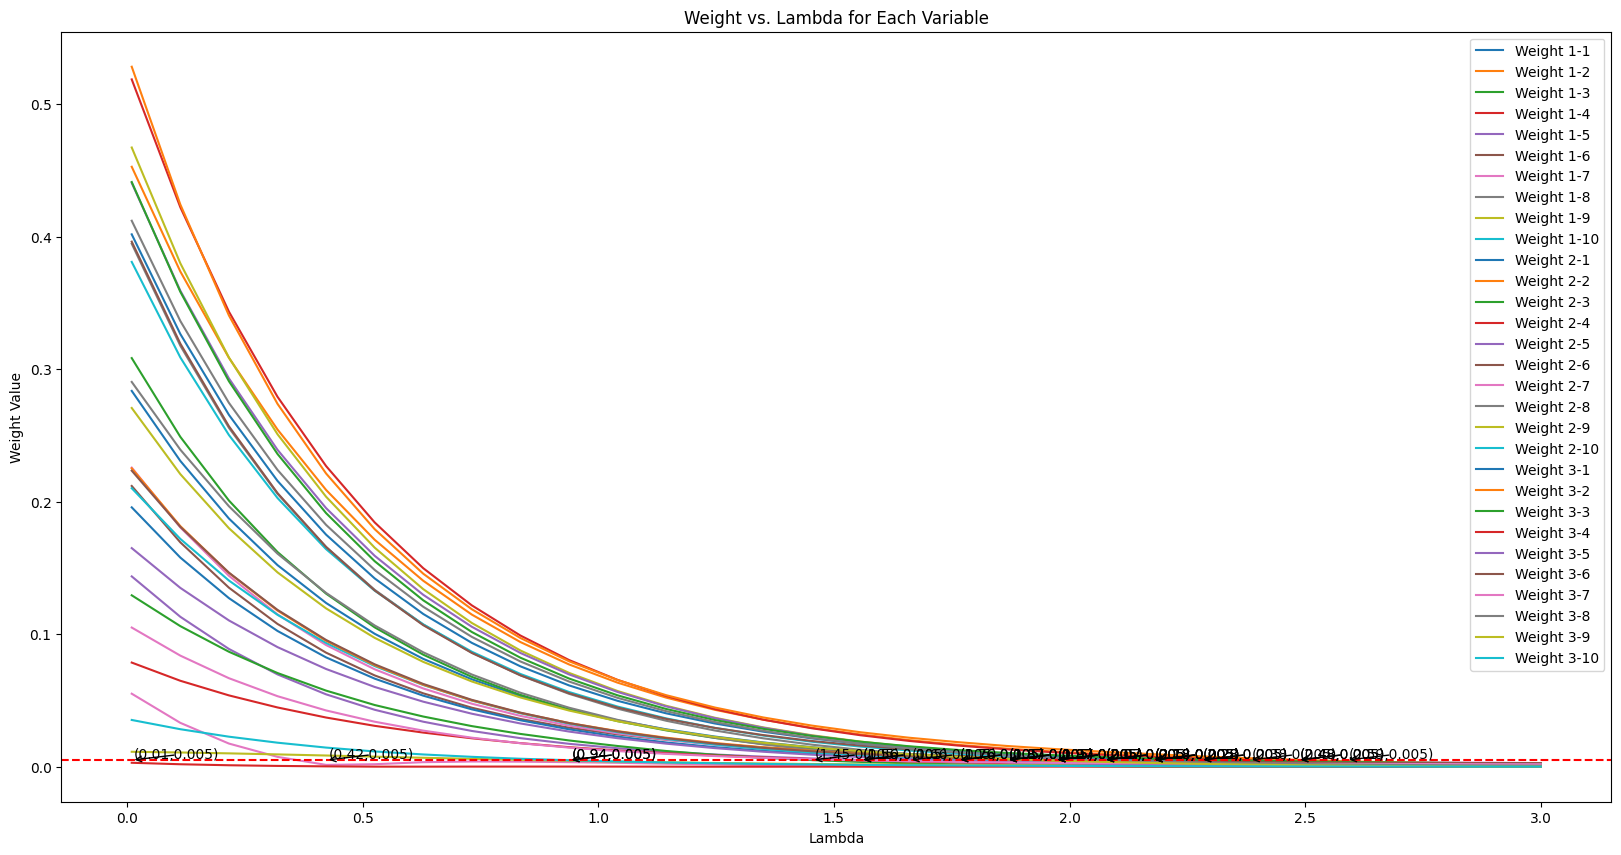

Lambda values when weights drop below threshold:
tensor([[2.0721, 1.8659, 2.1752],
        [2.4845, 2.5876, 1.9690],
        [1.8659, 1.4534, 2.3814],
        [2.4845, 1.5566, 0.0100],
        [1.6597, 2.0721, 1.7628],
        [2.2783, 2.2783, 1.9690],
        [2.0721, 0.4224, 1.5566],
        [1.9690, 1.7628, 2.1752],
        [2.1752, 0.9379, 1.9690],
        [2.1752, 1.8659, 0.9379]])

Intersection Points (Lambda, Weight):
(2.07, 0.005)
(2.48, 0.005)
(1.87, 0.005)
(2.48, 0.005)
(1.66, 0.005)
(2.28, 0.005)
(2.07, 0.005)
(1.97, 0.005)
(2.18, 0.005)
(2.18, 0.005)
(1.87, 0.005)
(2.59, 0.005)
(1.45, 0.005)
(1.56, 0.005)
(2.07, 0.005)
(2.28, 0.005)
(0.42, 0.005)
(1.76, 0.005)
(0.94, 0.005)
(1.87, 0.005)
(2.18, 0.005)
(1.97, 0.005)
(2.38, 0.005)
(0.01, 0.005)
(1.76, 0.005)
(1.97, 0.005)
(1.56, 0.005)
(2.18, 0.005)
(1.97, 0.005)
(0.94, 0.005)
Lambda values when weights drop below threshold:
tensor([[2.0721, 1.8659, 2.1752],
        [2.4845, 2.5876, 1.9690],
        [1.8659, 1.4534, 2.3814],


In [46]:
net = Net(1,10,1)
net_copy = Net(1,10,1)
net_copy.load_state_dict(net.state_dict())

optimizer = optim.SGD(net.parameters(), lr=0.01)
criterion = nn.MSELoss()

lambda_range = torch.linspace(3.0, 0.01, 30)

weights = []
lambda_array = torch.zeros_like(net.fc1.weight)

for lambda_val in lambda_range:
    net.load_state_dict(net_copy.state_dict())
    
    for epoch in range(100):
        optimizer.zero_grad()
        X_tensor = torch.FloatTensor(X.values)
        output = net(X_tensor)
        Y_tensor = torch.FloatTensor(Y.values)
        loss = criterion(output, Y_tensor)
        l2_reg = lambda_val * torch.sum(torch.pow(net.fc1.weight, 2))
        total_loss = loss + l2_reg
        total_loss.backward()
        optimizer.step()

    with torch.no_grad():
        below_threshold = (torch.abs(net.fc1.weight) < 0.005)
        lambda_array[below_threshold] = lambda_val.item()
        
    weight_values = [param.data.clone() for param in net.fc1.parameters() if len(param.size()) > 1][0]
    weight_values = weight_values.detach().cpu().numpy()
    weights.append(weight_values)

weights = np.array(weights)
intersection_points = [] 

plt.figure(figsize=(20, 10))
for j in range(weights.shape[2]):
    for i in range(weights.shape[1]):
        plt.plot(lambda_range.numpy(), abs(weights[:, i, j]), label=f'Weight {j + 1}-{i + 1}')

plt.axhline(y=0.005, color='r', linestyle='--')
for j in range(lambda_array.shape[1]):
    for i in range(lambda_array.shape[0]):
        if lambda_array[i, j] > 0:
            y_val = 0.005
            x_val = lambda_array[i, j]
            intersection_points.append((x_val, y_val))
            plt.annotate(f'({x_val:.2f},{y_val:.3f})', xy=(x_val, y_val), xytext=(x_val+0.005, y_val+0.001), arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.xlabel('Lambda')
plt.ylabel('Weight Value')
plt.legend()
plt.title('Weight vs. Lambda for Each Variable')
plt.show()

print("Lambda values when weights drop below threshold:")
print(lambda_array)

print("\nIntersection Points (Lambda, Weight):")
for point in intersection_points:
    print(f"({point[0]:.2f}, {point[1]:.3f})")

print("Lambda values when weights drop below threshold:")
print(lambda_array)